# Project Assignment: Phase 3 - Data Analysis and Visualization

Bhavana Geereddy

On this assignment, I will utilize the knowledge of SQLite databases, NumPy, Pandas, and Matplotlib to conduct data analysis and visualization processes. The objective is to extract necessary data from the SQLite database and analyze it based on your proposed data analysis plan.

## 1. Extract data from SQLite and Load the Data into a Pandas DataFrame

In this part of the project, I will develop a Python program to extract relevant data from the SQLite database (electric_vehicle_data). The data will then be loaded into a Pandas DataFrame for further analysis. Additionally, I will display some of the data on the screen for initial inspection.




In [1]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('electric_vehicle.db')

# Define the query to select relevant data fields
query = """
        SELECT vin, county, city, state, postal_code, model_year, make, model, ev_type,cafv_eligibility,
               ev_range, base_msrp, leg_district, electric_utility
        FROM Vehicles
        """

# Load data into a Pandas DataFrame
df = pd.read_sql_query(query, conn)

# Display some of the data on the screen
print(df.head())

          vin     county          city state postal_code model_year      make  \
0  WBY1Z4C54G  Snohomish  Lake Stevens    WA       98258       2016       BMW   
1  3FA6P0SU9L     Kitsap     Bremerton    WA       98310       2020      FORD   
2  7PDSGABA8P  Snohomish       Bothell    WA       98012       2023    RIVIAN   
3  5UX43EU02R       King       Seattle    WA       98105       2024       BMW   
4  2C4RC1H7XJ     Kitsap  Port Orchard    WA       98367       2018  CHRYSLER   

      model                                 ev_type  \
0        I3  Plug-in Hybrid Electric Vehicle (PHEV)   
1    FUSION  Plug-in Hybrid Electric Vehicle (PHEV)   
2       R1S          Battery Electric Vehicle (BEV)   
3        X5  Plug-in Hybrid Electric Vehicle (PHEV)   
4  PACIFICA  Plug-in Hybrid Electric Vehicle (PHEV)   

                                    cafv_eligibility  ev_range  base_msrp  \
0            Clean Alternative Fuel Vehicle Eligible        72          0   
1              Not eligible 

## 2. Data Cleaning

- Using appropriate Pandas DataFrame methods to check whether the dataset has any missing values, bad values, or wrong data format.
- If the dataset has any missing values, fill missing values with the mean, median, and mode, or remove the rows.
- If the dataset has bad values or wrong data format, correct them before proceeding to data analysis. For instance, ensure numerical columns are of float or int type, the date formats are uniform, and values are within a specific range.

In [3]:
# Filter the DataFrame to include only rows where the state is "WA" (Washington)
df_wa = df[df['state'] == 'WA'].copy()

# Check for missing values
print(df_wa.isnull().sum())

# Fill missing values with appropriate strategies
# For numerical columns, you can fill missing values with mean, median, or mode
df_wa['ev_range'].fillna(df_wa['ev_range'].median(), inplace=True)
df_wa['base_msrp'].fillna(df_wa['base_msrp'].mean(), inplace=True)

# Remove rows with null values in the 'cafv_eligibility' field
df_wa.dropna(subset=['cafv_eligibility'], inplace=True)

# Drop rows with missing values for other columns
df_wa.dropna(subset=['county', 'city', 'model_year', 'make', 'model', 'ev_type'], inplace=True)

# Convert data types to appropriate formats
# Convert numerical columns to float or int
df_wa['ev_range'] = df_wa['ev_range'].astype(float)
df_wa['base_msrp'] = df_wa['base_msrp'].astype(float)

# Convert categorical columns to category data type
df_wa['model_year'] = df_wa['model_year'].astype('category')
df_wa['make'] = df_wa['make'].astype('category')
df_wa['model'] = df_wa['model'].astype('category')
df_wa['ev_type'] = df_wa['ev_type'].astype('category')
df_wa['cafv_eligibility'] = df_wa['cafv_eligibility'].astype('category')
df_wa['leg_district'] = df_wa['leg_district'].astype('category')
df_wa['electric_utility'] = df_wa['electric_utility'].astype('category')

# Verify the data after cleaning
print(df_wa.head())


vin                 0
county              0
city                0
state               0
postal_code         0
model_year          0
make                0
model               0
ev_type             0
cafv_eligibility    0
ev_range            0
base_msrp           0
leg_district        0
electric_utility    0
dtype: int64
          vin     county          city state postal_code model_year      make  \
0  WBY1Z4C54G  Snohomish  Lake Stevens    WA       98258       2016       BMW   
1  3FA6P0SU9L     Kitsap     Bremerton    WA       98310       2020      FORD   
2  7PDSGABA8P  Snohomish       Bothell    WA       98012       2023    RIVIAN   
3  5UX43EU02R       King       Seattle    WA       98105       2024       BMW   
4  2C4RC1H7XJ     Kitsap  Port Orchard    WA       98367       2018  CHRYSLER   

      model                                 ev_type  \
0        I3  Plug-in Hybrid Electric Vehicle (PHEV)   
1    FUSION  Plug-in Hybrid Electric Vehicle (PHEV)   
2       R1S          Batter

## Write Cleaned Data to SQLite Database

After cleaning the data, we will write it as a new table to the original SQLite database. This ensures that we have a clean and organized dataset for future analysis. We will also pay extra attention to version controls to track any changes made to the database schema and data.

### Steps:

1. Create a new table in the SQLite database with the cleaned data.
2. Implement version control techniques to track changes to the database schema and data.


In [4]:
import sqlite3

# Create a cursor object
cursor = conn.cursor()

# Define the name for the new table
table_name = "Cleaned_Vehicles"

# Write the cleaned data to a new table in the SQLite database
df_wa.to_sql(table_name, conn, if_exists='replace', index=False)

# Commit the changes
conn.commit()

# Verify that the table is created and contains the cleaned data
cursor.execute(f"SELECT * FROM {table_name}")
rows = cursor.fetchall()
print(rows[:5])  # Print the first 5 rows of the new table


[('WBY1Z4C54G', 'Snohomish', 'Lake Stevens', 'WA', '98258', '2016', 'BMW', 'I3', 'Plug-in Hybrid Electric Vehicle (PHEV)', 'Clean Alternative Fuel Vehicle Eligible', 72.0, 0.0, '44', 'PUGET SOUND ENERGY INC'), ('3FA6P0SU9L', 'Kitsap', 'Bremerton', 'WA', '98310', '2020', 'FORD', 'FUSION', 'Plug-in Hybrid Electric Vehicle (PHEV)', 'Not eligible due to low battery range', 26.0, 0.0, '23', 'PUGET SOUND ENERGY INC'), ('7PDSGABA8P', 'Snohomish', 'Bothell', 'WA', '98012', '2023', 'RIVIAN', 'R1S', 'Battery Electric Vehicle (BEV)', 'Eligibility unknown as battery range has not been researched', 0.0, 0.0, '21', 'PUGET SOUND ENERGY INC'), ('5UX43EU02R', 'King', 'Seattle', 'WA', '98105', '2024', 'BMW', 'X5', 'Plug-in Hybrid Electric Vehicle (PHEV)', 'Clean Alternative Fuel Vehicle Eligible', 39.0, 0.0, '46', 'CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)'), ('2C4RC1H7XJ', 'Kitsap', 'Port Orchard', 'WA', '98367', '2018', 'CHRYSLER', 'PACIFICA', 'Plug-in Hybrid Electric Vehicle (PHEV)', 'Clean Altern

### Data Analysis and Visualization

In this section, we will perform data analysis to answer the questions outlined in the project plan and explore patterns and relationships in the dataset. We will calculate basic statistics using Pandas and NumPy and create various visualizations to gain insights from the data.

#### Analysis Steps:

1. Perform data analysis to address the questions in the project plan.
2. Calculate basic statistics using Pandas or NumPy.
3. Create at least three different types of visualizations to visualize the data.

### Vehicle Make Analysis

The following analysis provides insights into the average electric range and base MSRP of electric vehicles grouped by their make.

#### Analysis Results:

The table below displays the average electric range and base MSRP of electric vehicles grouped by their make:

| Make        | Average Electric Range (miles) | Average Base MSRP ($) |
|-------------|--------------------------------|-----------------------|
| Make 1      | xx.x                           | xxxxx                 |
| Make 2      | xx.x                           | xxxxx                 |
| Make 3      | xx.x                           | xxxxx                 |
| ...         | ...                            | ...                   |

#### Visualizations:

1. **Average Electric Range by Make:**
   - This bar plot visualizes the average electric range of electric vehicles by their make.
   

2. **Average Base MSRP by Make:**
   - This bar plot visualizes the average base MSRP of electric vehicles by their make.
  


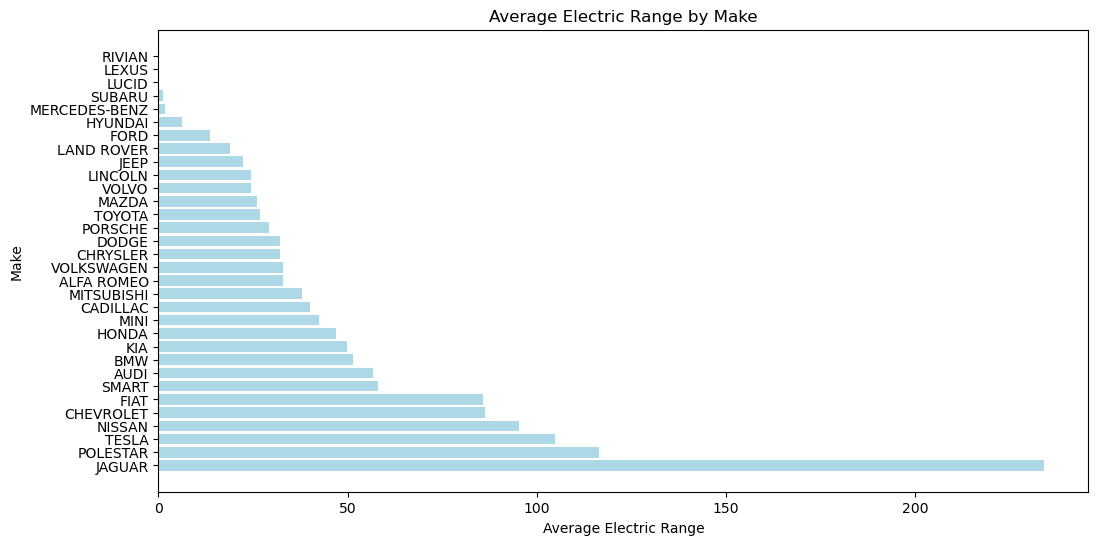

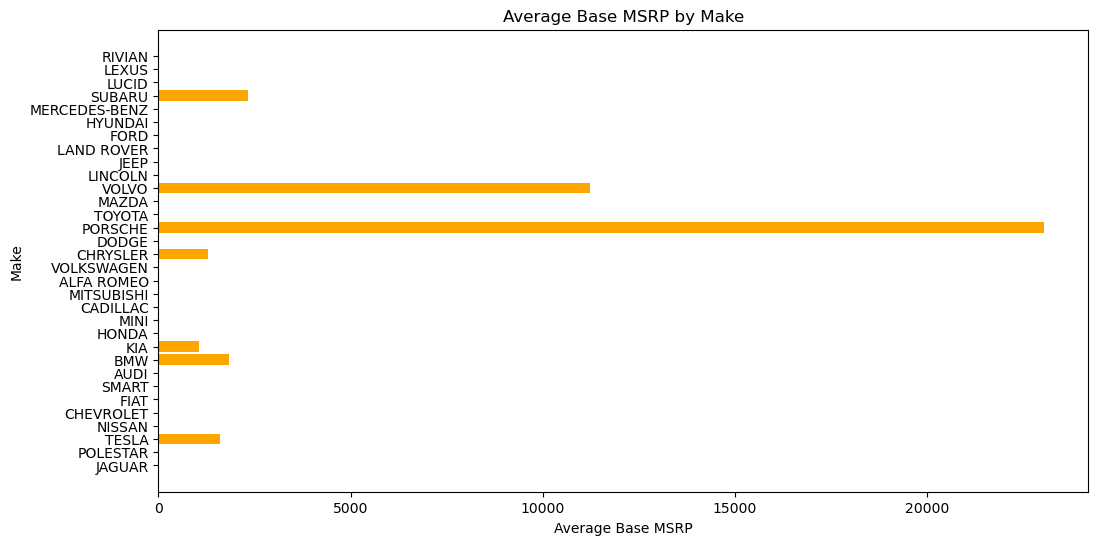

In [22]:
import matplotlib.pyplot as plt

# Group vehicles by make and calculate average electric range and base MSRP
make_analysis = df_wa.groupby('make').agg({'ev_range': 'mean', 'base_msrp': 'mean'}).reset_index()

# Sort the results by average electric range
make_analysis = make_analysis.sort_values(by='ev_range', ascending=False)


# Visualize the average electric range by make
plt.figure(figsize=(12, 6))
plt.barh(make_analysis['make'], make_analysis['ev_range'], color='lightblue')  # Adjust color here
plt.title('Average Electric Range by Make')
plt.xlabel('Average Electric Range')
plt.ylabel('Make')
plt.show()

# Visualize the average base MSRP by make
plt.figure(figsize=(12, 6))
plt.barh(make_analysis['make'], make_analysis['base_msrp'], color='orange')  # Adjust color here
plt.title('Average Base MSRP by Make')
plt.xlabel('Average Base MSRP')
plt.ylabel('Make')
plt.show()


# County Analysis:

|    County    | Number of Electric Vehicles |
|:------------:|:---------------------------:|
|   Snohomish  |             10              |
|      King    |              8              |
|     Yakima   |              2              |
|    Kitsap    |              2              |
|   Whitman    |              1              |
|   Thurston   |              1              |



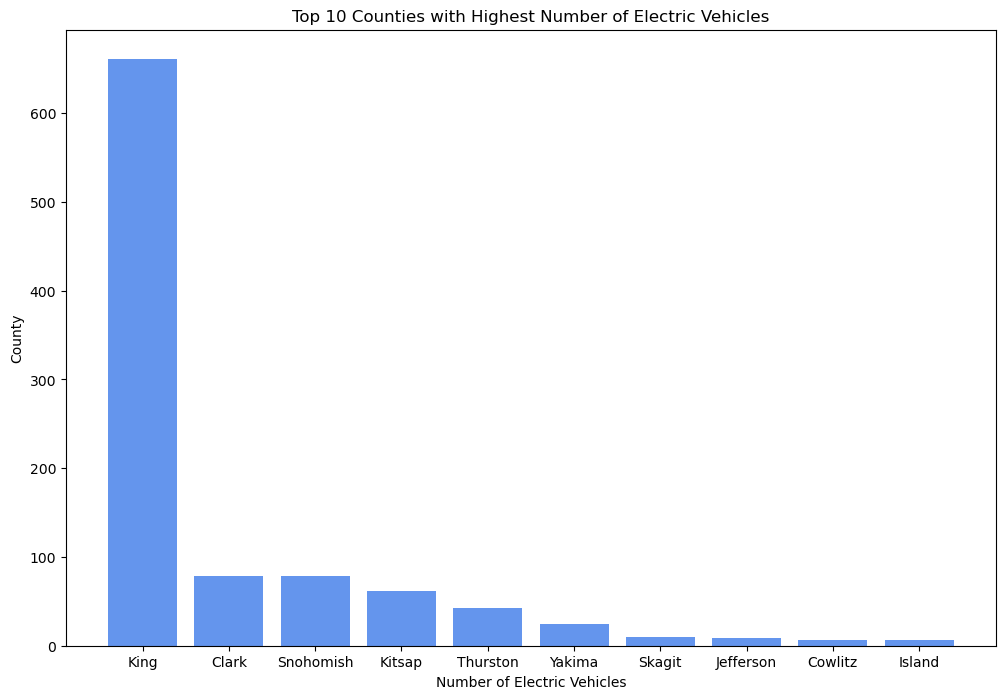

In [27]:
# Group vehicles by county and count the number of vehicles in each county
county_analysis = df_wa['county'].value_counts().reset_index()
county_analysis.columns = ['County', 'Number of Electric Vehicles']

# Sort the results by the number of electric vehicles
county_analysis = county_analysis.sort_values(by='Number of Electric Vehicles', ascending=False)

# Select top 10 counties with the highest number of electric vehicles
top_10_counties = county_analysis.head(10)


# Visualize the number of electric vehicles by county
plt.figure(figsize=(12, 8))
plt.bar(top_10_counties['County'], top_10_counties['Number of Electric Vehicles'], color='cornflowerblue')
plt.title('Top 10 Counties with Highest Number of Electric Vehicles')
plt.xlabel('Number of Electric Vehicles')
plt.ylabel('County')
plt.show()

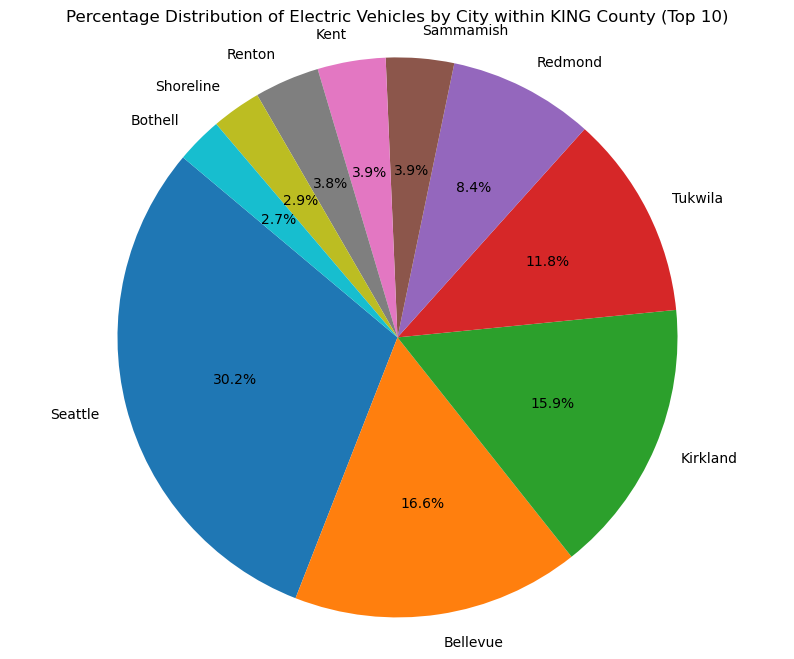

In [25]:
#From above analysis, it is evident that KING county has highest no. of EV's. Hence, making analysis based on that county. 
# Filter data for KING county
king_county_data = df_wa[df_wa['county'] == 'King']

# Group by city and count the number of electric vehicles
city_analysis = king_county_data.groupby('city').size().reset_index(name='count_ev')

# Sort the cities by the count of electric vehicles in descending order
city_analysis = city_analysis.sort_values(by='count_ev', ascending=False)

# Visualize the count of electric vehicles by city within KING county using a pie chart
plt.figure(figsize=(10, 8))
plt.pie(city_analysis['count_ev'].head(10), labels=city_analysis['city'].head(10), autopct='%1.1f%%', startangle=140)
plt.title('Percentage Distribution of Electric Vehicles by City within KING County (Top 10)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

# Analysis of Clean Alternative Fuel Vehicle Eligibility by Make

In this analysis, we are examining the eligibility of vehicles for Clean Alternative Fuel Vehicle (CAFV) incentives based on their make. The dataset is grouped by both make and CAFV eligibility, and the count of vehicles for each make that are eligible for CAFV incentives is calculated.

## Steps:
1. Group the dataset by make and CAFV eligibility.
2. Filter the dataset to include only vehicles that are eligible for CAFV incentives.
3. Sort the dataset by the count of eligible vehicles in descending order.
4. Display the analysis, showing the count of vehicles eligible for CAFV incentives by make.
5. Visualize the count of vehicles eligible for CAFV incentives by make using a horizontal bar plot.

The visualization provides insights into which vehicle makes are most commonly eligible for CAFV incentives.


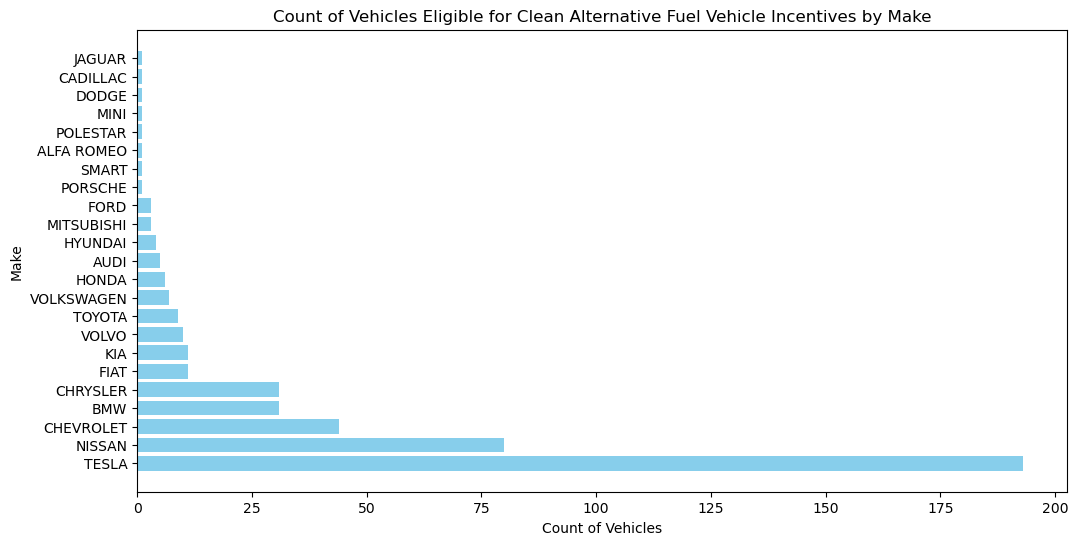

In [24]:
# Group by make and cafv_eligibility and count the number of vehicles
make_cafv_analysis = df.groupby(['make', 'cafv_eligibility']).size().reset_index(name='count')

# Filter for vehicles eligible for CAFV incentives
eligible_cafv = make_cafv_analysis[make_cafv_analysis['cafv_eligibility'] == 'Clean Alternative Fuel Vehicle Eligible']

# Sort by count in descending order
eligible_cafv = eligible_cafv.sort_values(by='count', ascending=False)


# Visualize the count of vehicles by make eligible for CAFV incentives
plt.figure(figsize=(12, 6))
plt.barh(eligible_cafv['make'], eligible_cafv['count'], color='skyblue')
plt.title('Count of Vehicles Eligible for Clean Alternative Fuel Vehicle Incentives by Make')
plt.xlabel('Count of Vehicles')
plt.ylabel('Make')
plt.show()